<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Sentiment-Analysis/TRUMP_SENTIMENT_ANALYSIS_NEWSBOMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GREEK

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 95.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

GREEK

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


GREEK

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
trump_articles = pd.read_csv("/content/gdrive/MyDrive/Εργασία Python/Articles/trump_df_2025.csv")

In [ ]:
len(trump_articles)

1431

In [ ]:
trump_articles.head(1)

,title,article_url,date,time,section,excerpt
0,Πρόεδρος FED για δασμούς Τραμπ: «Πιθανώς θα αυ...,/kosmos/story/1639695/proedros-fed-gia-dasmoys...,04.04.2025,18:39,ΚΟΣΜΟΣ,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...


In [ ]:
short_trump_fa_df = trump_articles[['date',"excerpt"]]

In [ ]:
short_trump_fa_df.tail()

,date,excerpt
1426,06.11.2024,Από την πρώτη στιγμή ο Έλον Μασκ βρίσκεται στο...
1427,06.11.2024,Αναπτύσσονται αστυνομικές δυνάμεις σε κρίσιμα ...
1428,06.11.2024,Το Newsbomb.gr μεταδίδει απευθείας από το Καπι...
1429,06.11.2024,Ο Τραμπ έχει δεσμευτεί να κάνει τις ΗΠΑ την υπ...
1430,06.11.2024,Η Μελάνια Τραμπ έδωσε στη δημοσιότητα ένα στιγ...


**Μετατρέπουμε το ```date``` σε ```datetime```**

In [ ]:
short_trump_fa_df.dtypes

,0
date,object
excerpt,object


In [ ]:
short_trump_fa_df['date'] = pd.to_datetime(short_trump_fa_df['date'], format='%d.%m.%Y')

<ipython-input-26-2062008958>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_trump_fa_df['date'] = pd.to_datetime(short_trump_fa_df['date'], format='%d.%m.%Y')


In [ ]:
short_trump_fa_df.dtypes

,0
date,datetime64[ns]
excerpt,object


In [ ]:
short_trump_fa_df.head()

,date,excerpt
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...
1,2025-04-04,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα..."
2,2025-04-04,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...
3,2025-04-04,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα..."
4,2025-04-04,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...


In [ ]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
# Remove rows with missing values in the 'text' column
short_trump_fa_df = short_trump_fa_df.dropna(subset=['excerpt'])

# Now fit the vectorizer on the cleaned data
matrix = vec.fit_transform(short_trump_fa_df['excerpt'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(1428, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

Οι λίστες που φτιάξαμε είναι της μορφής:

In [ ]:
trust_words

,word
8,αμην
15,γαμηλιο ταξιδι
24,διευθυντρια σχολειου
38,επικοινωνω
45,εκκλησια
...,...
13039,αληθης
13075,αναμφιβολως
13079,ανυπερβατος
13113,αναθηματικος


In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
1427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
1427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].sum(axis=1)

,0
0,1
1,1
2,1
3,0
4,0
...,...
1423,0
1424,0
1425,0
1426,1


In [ ]:
short_trump_fa_df.head(3)

,date,excerpt
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...
1,2025-04-04,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα..."
2,2025-04-04,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...


In [ ]:
short_trump_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)
short_trump_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)
short_trump_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)
short_trump_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
short_trump_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
short_trump_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)
short_trump_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
short_trump_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
short_trump_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)
short_trump_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_trump_fa_df.head()

,date,excerpt,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2025-04-04,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2025-04-04,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2025-04-04,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025-04-04,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Ensure the old index is dropped before setting 'date' - This line is redundant if the index is already the default integer index
# short_trump_fa_df.reset_index(inplace=True, drop=True)

# Set the 'date' column as the new index
short_trump_fa_df.set_index('date', inplace=True)
short_trump_fa_df

,excerpt,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,
2025-04-04,Τη δική του απάντηση στον Τραμπ έδωσε ο πρόεδρ...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2025-04-04,"Με ανάρτηση στο Truth Social, είπε ότι τώρα θα...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2025-04-04,Η σημερινή πτώση οφείλεται στο γεγονός ότι «συ...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2025-04-04,"Στη Φλόριντα, ο Ντόναλντ Τραμπ απολαμβάνει ένα...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025-04-04,Νωρίτερα σήμερα η Κίνα αποφάσισε να ανταποκριθ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,Από την πρώτη στιγμή ο Έλον Μασκ βρίσκεται στο...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2024-11-06,Αναπτύσσονται αστυνομικές δυνάμεις σε κρίσιμα ...,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0
2024-11-06,Το Newsbomb.gr μεταδίδει απευθείας από το Καπι...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

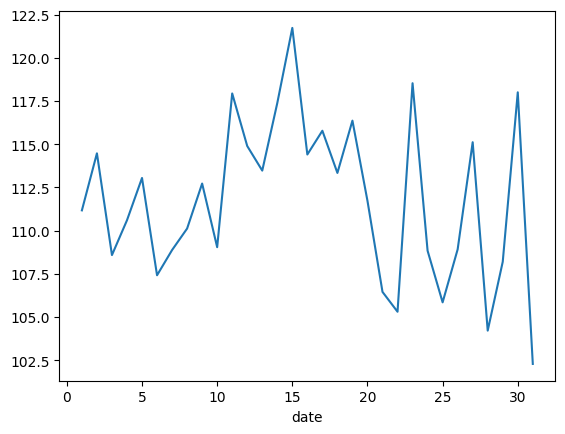

In [ ]:
short_trump_fa_df['excerpt'].str.len().groupby(by=short_trump_fa_df.index.day).mean().plot()

<Axes: xlabel='date'>

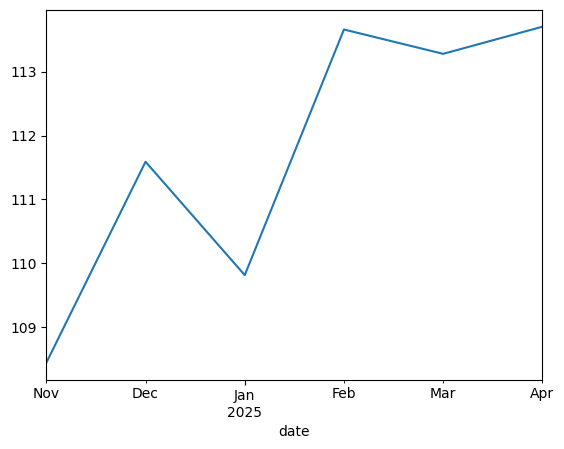

In [ ]:
short_trump_fa_df['excerpt'].str.len().resample('ME').mean().plot()

<Axes: ylabel='date'>

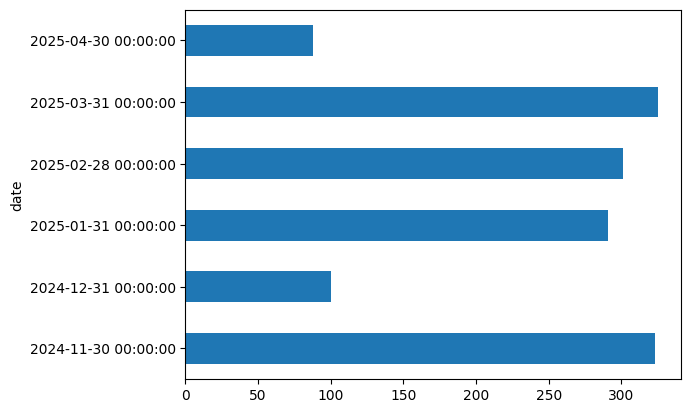

In [ ]:
short_trump_fa_df['excerpt'].resample('ME').count().plot(kind='barh')

<Axes: xlabel='date'>

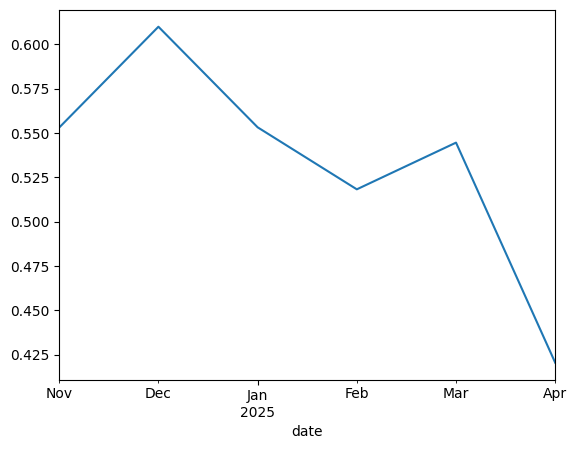

In [ ]:
short_trump_fa_df['positive'].resample('ME').mean().plot()

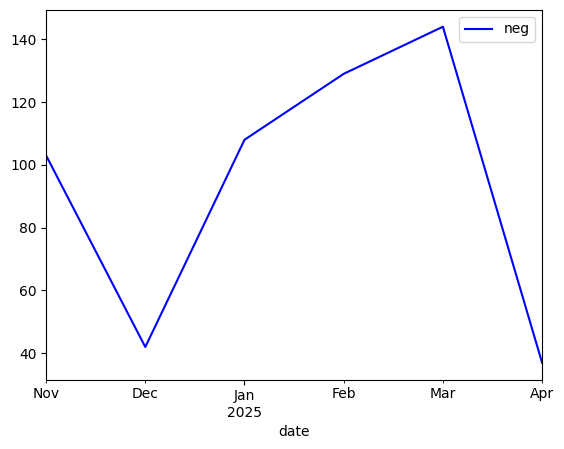

In [ ]:
short_trump_fa_df['negative'].resample('ME').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

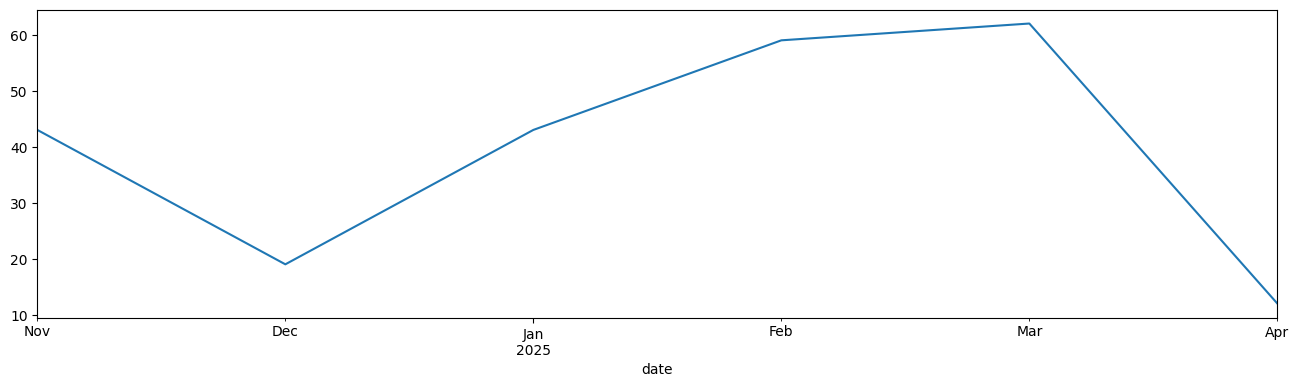

In [ ]:
short_trump_fa_df['anger'].resample('ME').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

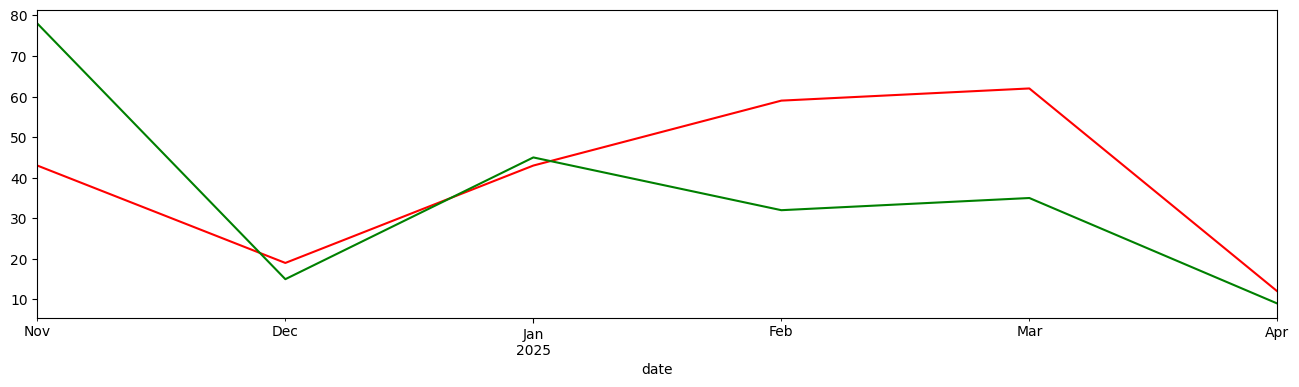

In [ ]:
ax = short_trump_fa_df['anger'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_trump_fa_df['joy'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

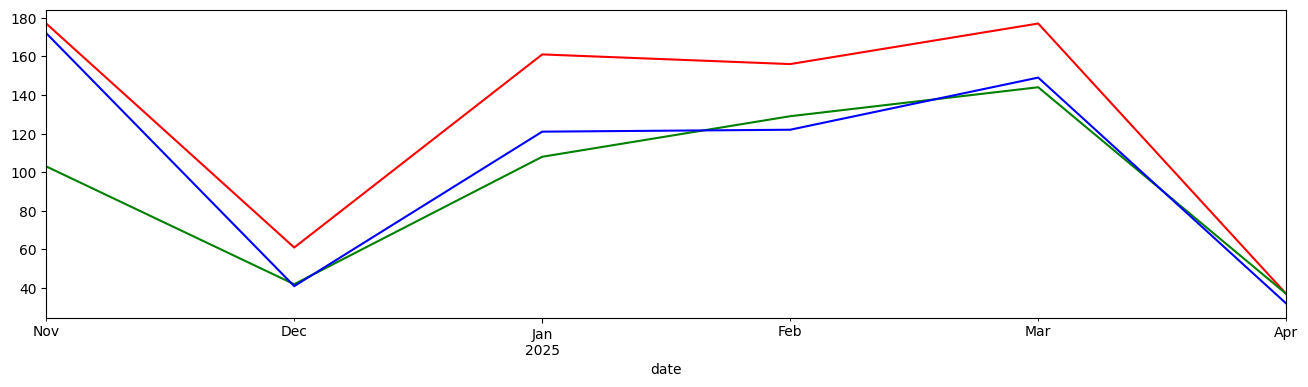

In [ ]:
ax = short_trump_fa_df['positive'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_trump_fa_df['negative'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_trump_fa_df['trust'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8-bright')

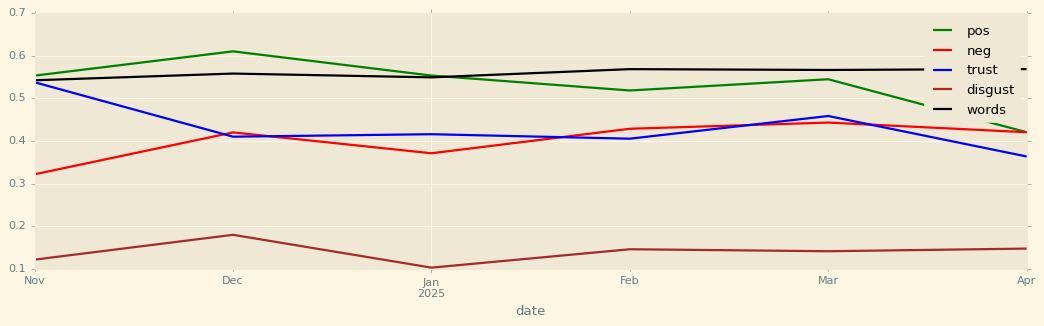

In [ ]:
ax = short_trump_fa_df['positive'].resample('ME').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_trump_fa_df['negative'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_trump_fa_df['trust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_trump_fa_df['disgust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_trump_fa_df['excerpt'].str.len().resample('ME').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

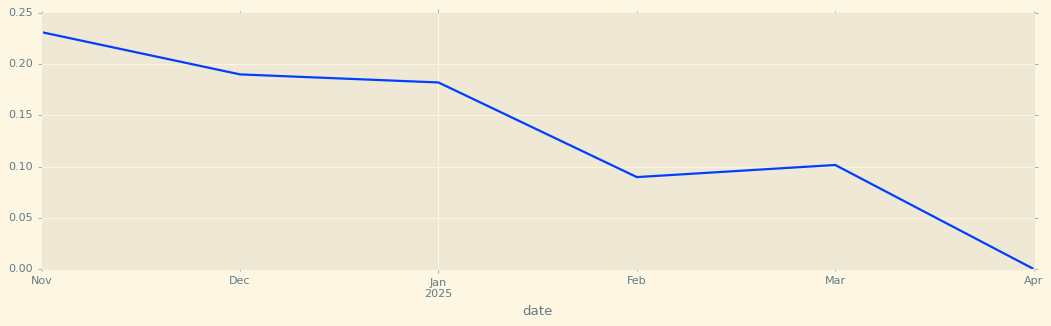

In [ ]:
short_trump_fa_df['pos/neg'] = short_trump_fa_df['positive'] - short_trump_fa_df['negative']
short_trump_fa_df['pos/neg'].resample('ME').mean().plot(figsize=(16,4))

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

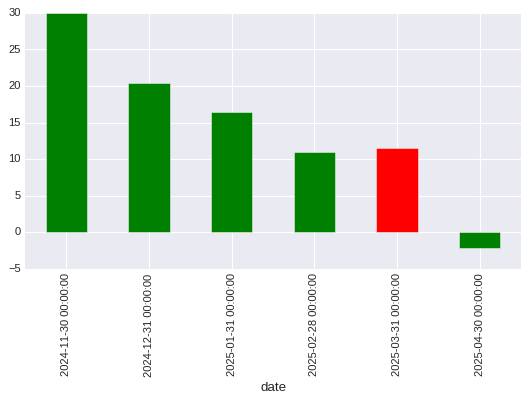

In [ ]:
short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_trump_fa_df.positive*100//short_trump_fa_df[['positive','negative']].sum(
        axis=1) - short_trump_fa_df.negative*100//short_trump_fa_df[['positive','negative']].sum(axis=1)

short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean().plot(kind='bar',
                                                                               color=(short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [ ]:
short_trump_fa_df[(short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_trump_fa_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][[ 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,
2025-04-04,0.0,1.0,-100.0
2025-04-04,0.0,1.0,-100.0
2025-04-04,1.0,0.0,100.0
2025-04-04,1.0,0.0,100.0
2025-04-04,2.0,0.0,100.0
...,...,...,...
2024-11-06,1.0,0.0,100.0
2024-11-06,1.0,0.0,100.0
2024-11-06,0.0,1.0,-100.0


In [ ]:
temp_df = short_trump_fa_df.reset_index()

In [ ]:
short_trump_fa_df.iloc[[20,5,0], short_trump_fa_df.columns.get_indexer(['article_url','title', 'text'])]

,(-)αρνητικότητα | θετικότητα(+),(-)αρνητικότητα | θετικότητα(+),(-)αρνητικότητα | θετικότητα(+)
date,,,
2025-04-04,NaN,NaN,NaN
2025-04-04,0.0,0.0,0.0
2025-04-04,0.0,0.0,0.0
